# Assignment 1


## FX Time Option   

An FX time option is a forward contract to exchange a pre-determined
amount of a currency at a pre-determined strike $K$ within a future
time period $[T_1,T_2]$. 

It is called a time option because of the American-style exercise feature. 
The holder can choose in this period to exercise parts of the total amount, 
but the total amount and no more must be exercised before or at time $T_2$.

We take the EUR/USD as the target exchange rate. A long position in a EUR
time option receives EUR at the exercise dates and pays USD. 

A short position will be paying EUR and receiving USD.

Assume a trader that is trying to maximise his payoff from this option. 

Answer the questions below using no-arbitrage reasoning to JUSTIFY your answers.

### FX Time Option vs Forward

Assume the trader is offered instead a plain-vanilla European forward, 
where he is required to exchange the full amount for the strike price at
a fixed future date. 

In which situations if any, does he prefer

- a forward with expiry $T_1$ (when compared to the time option)?
- a forward with expiry $T_2$ (when compared to the time option)?

### FX Time Option vs American Forward

Assume the trader is offered instead a “straight" American forward,
where he can choose the exercise time during the exercise period 
$[T_1,T_2]$ but has to exercise the full amount in a unique exercise. 

In which situations if any, does he prefer this American forward to the time option?

### FX Time Option vs Long American call and Short European Put

Assume the trader is offered instead a portfolio consisting of:

- a long American call option with exercise period $[T_1,T_2]$,
- a short Europen put option with expiry $T_2$.
  
Can he replicate the time option with this portfolio? 

If not, when does the replication fail?


### FX Time Option fair strike vs Forward fair strike

For a Long position (EUR buyer), what can you deduce about the fair strike 
compared to the plain-vanilla forward?

- with expiry $T_1$,
- with expiry $T_2$,
- with the maximum forward price $F_M$ for all expiries falling in the period $[T_1,T_2]$, i.e. 
$$F_M = \max_{T \in [T_1,T_2]} F(T)$$
where $F(T)$ denotes the forward price for expiry $T$.


## No-arbitrage bounds for a digital option

In [Merton (1973)](../readings/r1_merton1973.html), we saw in :eqref:`callbounds` 
there were bounds on the price of a call option. 

We can prove similar bounds for any option with a single payoff time using a portfolio of
the underlying and a risk-free bond. The main idea consists in creating a portfolio
that dominates the payoff. We look for the cheapest portfolio of stocks and bonds
which dominates the option payoff at expiry, and for the most expensive 
portfolio dominated by it at expiry.

The payoff of a portfolio of stocks and zero-coupond bonds is a linear function, and hence
what we are in effect doing is looking for a closest straight lines above and below the payoff.

In this problem, you are asked to use the same approach to find the bounds on a digital call 
option with strike $K$ and expiry $T$ on a non-dividend paying stock. 

The digital call pays $1$ at expiry if the stock is higher than the strike and zero otherwise.

### Digital call option payoff

- What is the payoff function of the digital call option?
- Finish the code below to draw the digital call option payoff 
  and its price function under Black-Scholes model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


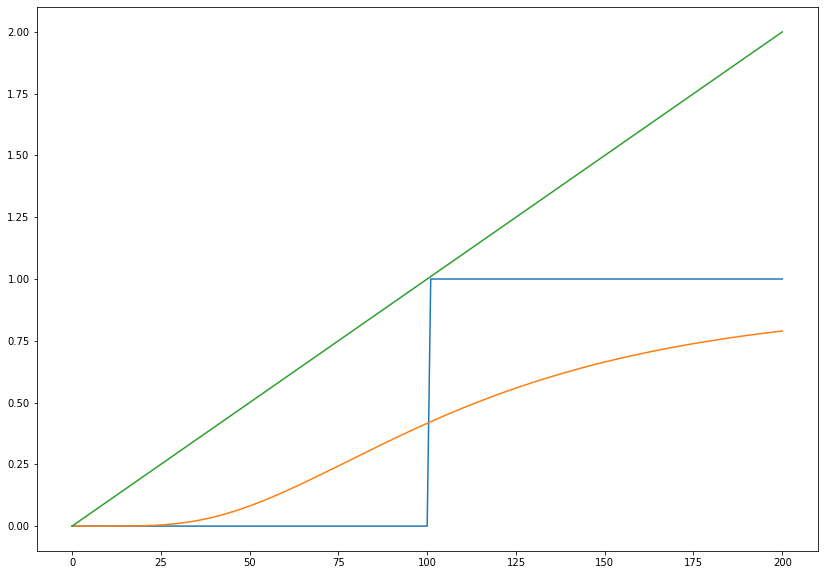

In [32]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as si
from scipy import stats
plt.rcParams['figure.figsize'] = (14,10)

K = 100
T = 5
r = 0.02
vol = 0.25

def bs_digital_call_value(S, K, T, r, vol):
    '''Computes BSM digital call option value'''
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T)) 
    call = np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    return call
    ## write your code here and 
    ## replace the 'pass' by a return statement to return the value
    
    #pass

#### Uncomment the line below and change the code to create 
####  the grid values of the underlying to use in your plots

S = np.linspace(0, 200, num=201)
digital_call_payoffs=np.zeros_like(S)
i = np.where(S>100)
digital_call_payoffs[i] = 1
potfolio1_payoffs = S/K
potfolio2_payoffs = np.exp(r * T)

# digital_call_values = ...
bs_digital_call_value(S, K, T, r, vol)
digital_call_value = bs_digital_call_value(S, K, T, r, vol)
## Plot call payoff and value functions
## Uncomment the plotting lines and complete
plt.figure()
b1= plt.plot(digital_call_payoffs)
b2= plt.plot(digital_call_value)
b3= plt.plot(potfolio1_payoffs)
b4= plt.plot(potfolio2_payoffs)
 
plt.show()

### Digital call dominating portfolio

We are looking for portfolios that dominate the digital call payoff, 
with investment in $\alpha$ stocks and $\beta$ zero-coupon bonds. 

We denote by $S_t$ the value of the stock at time $t$ and $B_t^T$ the value
at time $t$ of the zero-coupon bond for expiry $T$.

- what is the payoff at expiry of the portfolio?
- what is the value of the portfolio?
- find a solution $\alpha$ and $\beta$ for a linear dominating portfolio such that
its payoff function equals the digital calls payoff when the stock is zero and when
it is equal to $K$. Add a plot of the payoff of this portfolio on the code above.
- find the cheapest dominating portfolio with no stock investment. 
Add a plot of the payoff of this portfolio on the code above.
- given the two dominating portfolios, deduce an upper bound for the digital call price.
Add a plot of this upper bound on the code above.

### The optimal lower bound for the digital call is zero

Since the payoff is always zero or more, we know that zero is a lower bound. Prove that zero
is in fact the optimal lower bound, i.e. there is no higher lower bound.


## Static replication

### Collar strategy

A collar is an option portfolio strategy made with the following positions:

- long stock
- long put with strike $L$ with expiry $T$
- short call with strike $U$ with expiry $T$

where $L < S < U$.

#### Collar payoff

Complete the code below to plot the collar payoff and value functions.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log


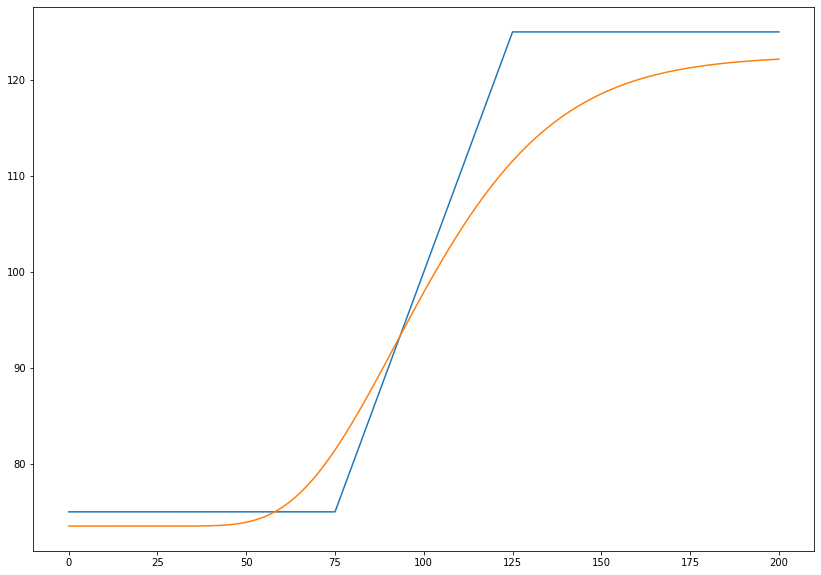

In [14]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as si
from scipy import stats
plt.rcParams['figure.figsize'] = (14,10)


L = 75
S = 100
U = 125
T = 1
r = 0.02
vol = 0.25

def bs_call_value(S, U, T, r, vol):
    '''Computes BSM call option value'''
    d1 = (np.log(S / U) + (r + 0.5* vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / U) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    call = (S * si.norm.cdf(d1, 0.0, 1.0) - U * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    return call
    ## write your code here and 
    ## replace the 'pass' by a return statement to return the value
    
    #pass

def bs_put_value(S, L, T, r, vol):
    '''Computes BSM put option value'''
    d1 = (np.log(S / L) + (r + 0.5* vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / L) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    put = (L * np.exp(-r * T) * si.norm.cdf(-d2, 0, 1) - S * si.norm.cdf(-d1,0, 1))
    return put
    ## write your code here and 
    ## replace the 'pass' by a return statement to return the value
    
    #pass

#### Uncomment the line below and change the code to create 
####  the grid values of the underlying to use in your plots
S = np.linspace(0, 200, num=201)
xx=np.zeros_like(S.size)

bs_call_value(S, U, T, r, vol)
call_payoffs = np.maximum(S-U,xx)
call_values = bs_call_value(S, U, T, r, vol)

bs_put_value(S, L, T, r, vol)
put_payoffs = np.maximum(L-S,xx)
put_values = bs_put_value(S, L, T, r, vol)
#### Uncomment the line below and complete the code
collar_payoffs = S + put_payoffs - call_payoffs
collar_values = S + put - call

## Plot call payoff and value functions
## Uncomment the plotting lines and complete
plt.figure()
b1=plt.plot(collar_payoffs)
b2=plt.plot(collar_values)
plt.show()

#### Another collar decomposition

Find two different portfolios with the same payoff as the collar strategy.


## Log Contract, Variance Swap and Stochastic Volatility

For simplicity assume zero interest rates and dividends 
and stock price follows the process:
$$dS_t = σ_t S_t dW_t,$$
with stochastic volatility $σ_t$.

The variance swap payoff is
$$ \frac{1}{N} \sum_{i=0}^{N-1} \left( \frac{S_{t_{i+1}}-S_{t_i}}{S_{t_i}} \right)^2 - K$$

Assume we have a derivative with log payoff:
$$\log{\frac{S_T}{S_0}}$$

- Show that the variance swap payoff can be replicated with 
the log contract and stocks, and give the detail of the strategy.
- Give a static replication strategy for the log contract in terms of calls and puts.
- Show that the price $L(t,T)$ at time $t$ of the log contract satisfies:
 $$L(t,T) = \mathbf{E^Q}_t\left[-\frac{1}{2}\int_t^T \sigma_u^2 du \right]$$
- What is the drift of the log contract price process $L(t,T)$ under the risk-neutral measure?
- Denote by $\Gamma(t,T)$ the volatility of $L(t,T)$. What is the value $\Gamma(T,T)$ at time $T$?
- Let $\nu_t(T)$ denote the forward variance:
  $$\nu_t(T)=\mathbf{E^Q}_t\left[\sigma_T^2\right]$$
Show that:
$$d\nu_t(T)=-2\frac{\partial\Gamma(t,T)}{\partial T}dW_t$$
- Deduce the stochastic integral for 
  $$\int_0^T \sigma_t^2 dt$$